# **Supervised Learning with scikit-learn**

In [144]:
import sys
print(sys.version)

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]


In this chapter, you'll be introduced to classification problems and learn how to solve them using supervised learning techniques. You'll learn how to split data into training and test sets, fit a model, make predictions, and evaluate accuracy. You’ll discover the relationship between model complexity and performance, applying what you learn to a churn dataset, where you will classify the churn status of a telecom company's customers.

[Reference link!](https://gist.github.com/michaelmallari/4650110348136e6bf7b42eaf5aeab099)

## Chapter 1 - Classification

**k-Nearest Neighbors: Fit**

In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The target, "churn", needs to be a single column with the same number of observations as the feature data. The feature data has already been converted into numpy arrays.

In [145]:
#import libraries requiered
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.width", 10000)

#calling the file 
churn_df = pd.read_csv('telecom_churn_clean.csv')
print(churn_df.head(3))


   Unnamed: 0  account_length  area_code  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  customer_service_calls  churn
0           0             128        415                   0                1                     25              265.1              110             45.07              197.4               99             16.78                244.7                 91               11.01                10.0                 3               2.70                       1      0
1           1             107        415                   0                1                     26              161.6              123             27.47              195.5              103             16.62                254.4                103               11.45                13

In [146]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

**k-Nearest Neighbors: Predict**

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

    X_new = np.array([[30.0, 17.5],
                    [107.0, 24.1],
                    [213.0, 10.9]])

In [147]:
# X_new
X_new = np.array([[30.0, 17.5],
                 [107.0, 24.1],
                 [213.0, 10.9]])

#Create y_pred by predicting the target values of the unseen features X_new.
# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


**Train/test split + computing accuracy**

In [148]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


**Overfitting and underfitting**


In [149]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors = neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


**Visualizing model complexity**

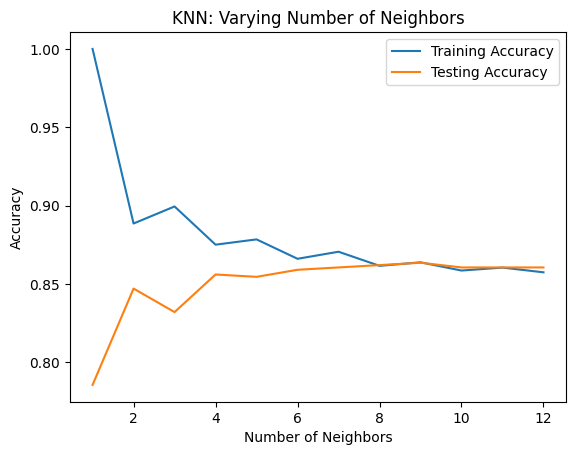

In [150]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Chapter 2 - Regression

In [151]:
#exploring data 

import pandas as pd
diabete_df = pd.read_csv('diabetes_clean.csv')
print(diabete_df.head(3))

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  diabetes
0            6      148         72       35        0  33.6  0.627   50         1
1            1       85         66       29        0  26.6  0.351   31         0
2            8      183         64        0        0  23.3  0.672   32         1


In [152]:
#creating feature and targeting arrays

X = diabete_df.drop('glucose', axis=1).values #dropping 'glucose from df'
y = diabete_df['glucose'].values # assigning 'glucose to 'y'
print (type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [153]:
#making predictions from a single feature

import numpy as np

X_bmi = X[:,3] 
print(y.shape, X_bmi.shape) #X_bmi is correct form for the model

#remodeling "X_bmi" for the numpy reading
X_bmi = X_bmi.reshape(-1,1)
print(X_bmi.shape) 

(768,) (768,)
(768, 1)


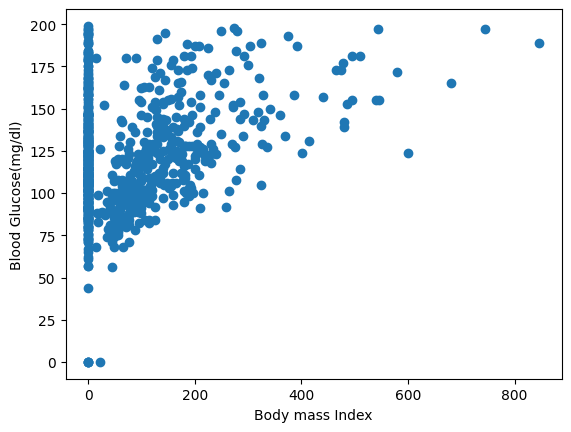

In [154]:
#plotting glucose vs body mass index
import matplotlib.pyplot as plt
plt.scatter(X_bmi,y)
plt.ylabel('Blood Glucose(mg/dl)')
plt.xlabel('Body mass Index')
plt.show()

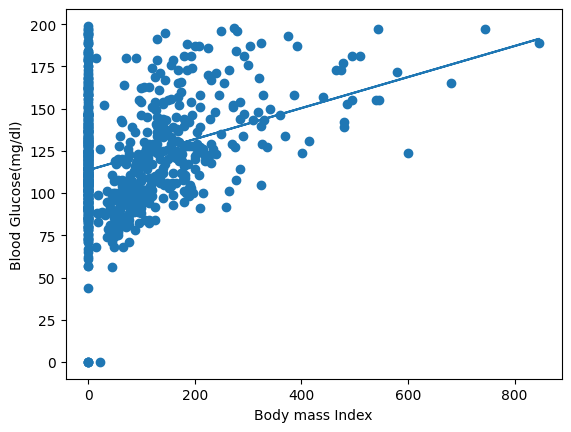

In [155]:
# fitting a regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi,y) # fit the model
predictions  = reg.predict(X_bmi) #making the predictions

#plotting the variables
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose(mg/dl)')
plt.xlabel('Body mass Index')
plt.show()

**Creating Features**

In [156]:
import numpy as np

#reading the dataset
sales_df = pd.read_csv("advertising_and_sales_clean.csv")

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


In [179]:
# this line intentionally created for code becomes influencer in float

sales_df['influencer'] = pd.to_numeric(sales_df['influencer'], errors='coerce').fillna(0)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   float64
 4   sales         4546 non-null   float64
dtypes: float64(5)
memory usage: 177.7 KB


**Building a linear regression model**

In [158]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


**Visualizing a linear regression model**

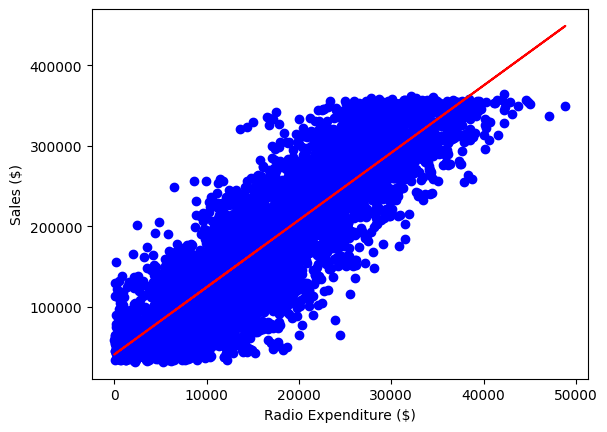

In [159]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

**Fit and predict for regression**

In [160]:
# Create X and y arrays
X = sales_df.drop("sales", axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Instantiate the model
reg = LinearRegression()


In [161]:
# # trying to solve the error of converting variable.....

# sales_df.info()

# sales_df['influencer'] = sales_df['influencer'].astype(float)

# sales_df['influencer'] = pd.to_numeric(sales_df['influencer'], errors='coerce')

# sales_df['influencer'] = pd.to_numeric(sales_df['influencer'], errors='coerce')
# sales_df = sales_df.dropna(subset=['influencer'])

# sales_df['influencer'] = pd.to_numeric(sales_df['influencer'], errors='coerce').fillna(0)


# sales_df['influencer'] = pd.to_numeric(sales_df['influencer'], errors='coerce')

# sales_df.head(4)

In [162]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


In [163]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared = False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990152104759368
RMSE: 2944.433199600102


C:\Users\300375916\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Cross-validation for R-squared**

In [164]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

# Create a KFold object
kf = KFold(n_splits = 6, shuffle = True, random_state = 5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv = kf)

# Print scores
print(cv_scores)

[0.99894062 0.99909245 0.9990103  0.99896344 0.99889153 0.99903953]


In [165]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989896443678249
6.608118371529651e-05
[0.99889767 0.99908583]


**Regularized regression: Ridge**

In [166]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


**Lasso regression for feature importance**

In [167]:
sales_columns = ["tv", "radio", "social_media"]

[ 3.56256515e+00 -3.91091923e-03  4.48078397e-03  5.20256349e+01
  6.36710895e+01 -2.43916497e+00 -1.94418673e+01]


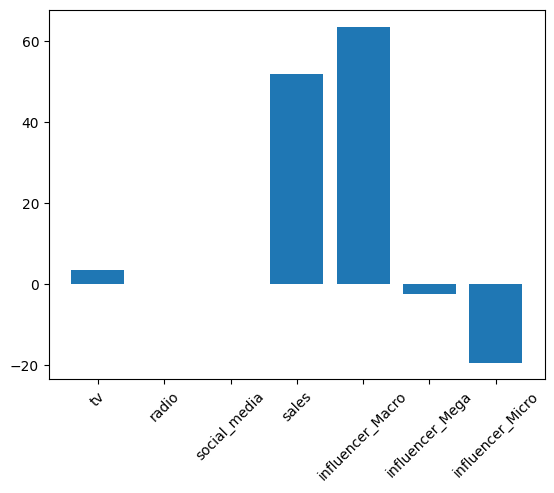

In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Read data from CSV file
file_path = 'advertising_and_sales_clean.csv'
sales_df = pd.read_csv(file_path)


# One-hot encode the 'influencer' column
sales_df_encoded = pd.get_dummies(sales_df, columns=['influencer'])

# Create X and y arrays
X = sales_df_encoded.drop("sales", axis=1).values
y = sales_df_encoded["sales"].values

# Instantiate a lasso regression model
lasso = Lasso(alpha=0.3)

# Fit the model to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.bar(sales_df_encoded.columns[:-1], lasso_coef)
plt.xticks(rotation=45)
plt.show()


## Chapter 3 - Fine-Tuning Your Model

In [169]:
# video

# from sklearn.metrics import classification_report,  confusion_matrix
# knn = KNeighborsClassifier(n_neighbors = 7)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
     

# print(confusion_matrix(y_test, y_pred))
     

# print(classification_report(y_test, y_pred))

**Deciding on a primary metric**

As you have seen, several metrics can be useful to evaluate the performance of classification models, including accuracy, precision, recall, and F1-score.

In this exercise, you will be provided with three different classification problems, and your task is to select the problem where precision is best suited as the primary metric.

- A model predicting the presence of cancer as the positive class.
- A classifier predicting the positive class of a computer program containing malware.
- (X) A model predicting if a customer is a high-value lead for a sales team with limited capacity.

**Assessing a diabetes prediction classifier**

In [170]:
diabetes_df = pd.read_csv("diabetes_clean.csv")
X = diabetes_df.drop("diabetes", axis = 1).values
y = diabetes_df["diabetes"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
     

# Import confusion matrix
from sklearn.metrics import classification_report,  confusion_matrix

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



**Building a logistic regression model**

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [172]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.26551025 0.18336598 0.12119633 0.15613539 0.49611224 0.44582209
 0.01359243 0.61646106 0.55640536 0.79311815]


C:\Users\300375916\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**The ROC curve**

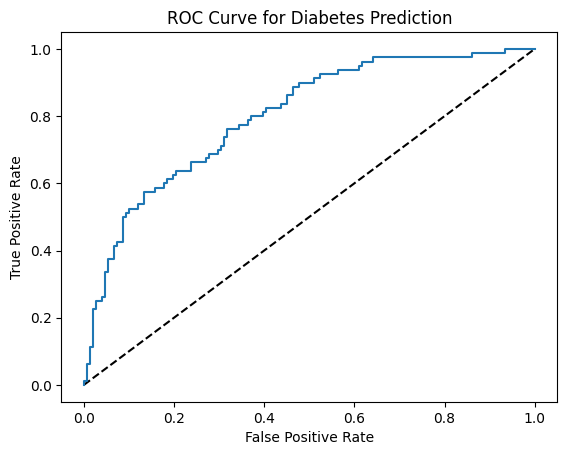

In [173]:
# Import roc_curve
from sklearn.metrics import roc_curve


# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

**ROC AUC**

In [174]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

0.8002483443708608
[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



**Hyperparameter tuning with GridSearchCV**

In [175]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1, 20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

Tuned lasso paramaters: {'alpha': 0.10527210526315789}
Tuned lasso score: 0.2905288091394486


**Hyperparameter tuning with RandomizedSearchCV**

In [176]:
from sklearn.model_selection import RandomizedSearchCV


In [177]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv = kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.06131836734693878, 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': 0.6877551020408164}
Tuned Logistic Regression Best Accuracy Score: 0.6406783187682065


C:\Users\300375916\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\300375916\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\300375916\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\300375916\AppData\Roaming\Python\

## Chapter 4 - Preprocessing and Pipelines


**Creating dummy variables**

In [188]:
# this line intentionally created for creating a music_df 
music_df = pd.read_csv('music_df.txt')
music_df.head(3)

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.7920,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.9500,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.0118,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic


In [185]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first = True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (50005, 77989)


**Regression with categorical features**

In [ ]:
# Create X and y
X = music_dummies.drop("popularity", axis = 1).values
y = music_dummies["popularity"].values

# Instantiate a ridge model
ridge = Ridge(alpha = 0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

**Dropping missing data**

In [187]:
music_df = pd.read_csv('music_clean.csv')
print(music_df.head(3))

   Unnamed: 0  popularity  acousticness  danceability  duration_ms  energy  instrumentalness  liveness  loudness  speechiness    tempo  valence  genre
0       36506        60.0      0.896000         0.726     214547.0   0.177          0.000002     0.116   -14.824       0.0353   92.934    0.618      1
1       37591        63.0      0.003840         0.635     190448.0   0.908          0.083400     0.239    -4.795       0.0563  110.012    0.637      1
2       37658        59.0      0.000075         0.352     456320.0   0.956          0.020300     0.125    -3.634       0.1490  122.897    0.228      1


In [189]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)

print(music_df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(music_df.shape))

instance_id         5
obtained_date       5
tempo               5
speechiness         5
mode                5
loudness            5
liveness            5
key                 5
instrumentalness    5
energy              5
duration_ms         5
danceability        5
acousticness        5
popularity          5
track_name          5
artist_name         5
valence             5
music_genre         5
dtype: int64


KeyError: ['genre']

**Pipeline for song genre prediction: I**

In [190]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)

# Build steps for the pipeline
steps = [("imputer", imputer), ("knn", knn)]

**Pipeline for song genre prediction: II**

In [191]:
steps = [("imputer", imp_mean),
        ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

NameError: name 'imp_mean' is not defined

**Centering and scaling for regression**

In [192]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

-6.287473975308266e-05


**Centering and scaling for classification**

In [193]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.7849660135945622 
 {'logreg__C': 0.05357894736842105}


## Evaluating multiple models

Different models for different problems
### Some guiding principles

- Size of the dataset
    - Fewer features = simpler model, faster training time
    - Some models require large amounts of data to perform well

- Interpretability
    - Some models are easier to explain, which can be important for stakeholders
    - Linear regression has high interpretability, as we can understand the coefficients

- Flexibility
    - May improve accuracy, by making fewer assumptions about data
    - KNN is a more flexible model, doesn't assume any linear relationships


### It's all in the metrics
- Regression model performance:
    - RMSE
    - R-squared

- Classification model performance:
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1-score
    - ROC AUC

- Train several models and evaluate performance out of the box

### A note on scaling

- Models a(ected by scaling:
    - KNN
    - Linear Regression (plus Ridge, Lasso)
    - Logistic Regression
    - Artificial Neural Network
- Best to scale our data before evaluating models


### Evaluating classification models
``` python
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

```

### Evaluating classification models
``` python

models = {  
            "Logistic Regression": LogisticRegression(),
            "KNN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier()
        }

results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()
```

![](./images/viz.png)


### Visualizing regression model performance (Exercise)

Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

Instructions:
- Write a for loop using model as the iterator, and model.values() as the iterable.
- Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
- Append the model's cross-validation scores to the results list.
- Create a box plot displaying the results, with the x-axis labels as the names of the models.

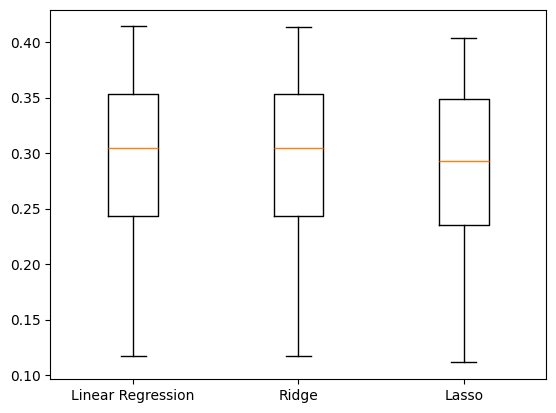

In [194]:
models = {
            "Linear Regression": LinearRegression(), 
            "Ridge": Ridge(alpha=0.1), 
            "Lasso": Lasso(alpha=0.1)
            }
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

### Predicting on the test set (Exercise)
In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

Instructions:
- Import mean_squared_error.
- Fit the model to the scaled training features and the training labels.
- Make predictions using the scaled test features.
- Calculate RMSE by passing the test set labels and the predicted labels.

In [195]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled, y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

NameError: name 'X_train_scaled' is not defined

### Visualizing classification model performance (Exercise)

In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.

Instructions:
- Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.
- Loop through the values in models.
- Instantiate a KFold object to perform 6 splits, setting shuffle to True and random_state to 12.
- Perform cross-validation using the model, the scaled training features, the target training set, and setting cv equal to kf.

In [196]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), 
          "KNN": KNeighborsClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

NameError: name 'DecisionTreeClassifier' is not defined


### Pipeline for predicting song popularity (Exercise)
For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

Instructions:
- Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
- Create a pipeline object, and pass the steps variable.
- Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
- Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [197]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.334, 'logreg__solver': 'newton-cg'}, Accuracy: 0.7337662337662337


## What you've covered

- Using supervised learning techniques to build predictive models
- For both regression and classi,cation problems
- Underfitting and overfittng
- How to split data
- Cross-validation
- Data preprocessing techniques
- Model selection
- Hyperparameter tuning
- Model performance evaluation
- Using pipelines